<a href="https://colab.research.google.com/github/Liang130520/Tibame-Machine-Learning/blob/main/class1103_machine_learning_Kaggle_Titanic_16_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
" Kaggle "
from urllib.request import urlretrieve

url = "https://github.com/Elwing-Chou/tibaml1017/raw/main/titanic/train.csv"
urlretrieve(url, "train.csv")

url = "https://github.com/Elwing-Chou/tibaml1017/raw/main/titanic/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7f544d5f6a10>)

In [2]:
import pandas as pd

datas = pd.read_csv("train.csv", encoding = "utf-8")
predicts = pd.read_csv("test.csv", encoding = "utf-8")

In [3]:
predicts

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
combine = pd.concat([datas, predicts], axis = 0, ignore_index = True) # 重設 預設ID
combine = combine.drop(["PassengerId", "Survived"], axis = 1) # 建立去除此兩欄的新表
combine

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
def change(c):
  if pd.isna(c):
    return c
  else:
    return c[0]
combine["Cabin"] = combine["Cabin"].apply(change)
combine["Cabin"]


0       NaN
1         C
2       NaN
3         C
4       NaN
       ... 
1304    NaN
1305      C
1306    NaN
1307    NaN
1308    NaN
Name: Cabin, Length: 1309, dtype: object

In [6]:
# n = "Braund, Mr. Owen Harris"
# n.split(".")[0].split(",")[-1].strip() # strip 去掉前後空格
def change(n):
  if pd.isna(n):
    return n
  else:
    return n.split(".")[0].split(",")[-1].strip()
combine["Name"] = combine["Name"].apply(change)
combine["Name"]

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Name, Length: 1309, dtype: object

In [7]:
count = combine["Ticket"].value_counts() # Series 可當作 Dict 處理
def change(t):
  if pd.isna(t):
    return t
  else:
    return count[t]
# combine["Ticket"]
combine["Ticket"] = combine["Ticket"].apply(change)
combine["Ticket"]

0       1
1       2
2       1
3       2
4       1
       ..
1304    1
1305    3
1306    1
1307    1
1308    3
Name: Ticket, Length: 1309, dtype: int64

In [8]:
" 留取資料 "
# Pandas 的篩選操作 Filter
# DataFrame / Series [帶入跟你資料筆數一樣多的True/False]
pd.DataFrame([
    [1, 2],
    [3, 4],
    [5, 6]
])[[True, False, True]] #True外層[] 為袋子, 裝著資料的容器, 容器內只留1,3筆資料
pd.Series([1, 2, 3])[[True, False, True]] 

0    1
2    3
dtype: int64

In [9]:
combine
combine.isna() # 確認哪些是空值
s = combine.isna().sum() # 確認每欄有幾個空值
s > 0 # 將每欄 > 0 呈現, 即為布林判斷
s[s > 0] # 如剛剛的留取資料概念
s[s > 0].sort_values(ascending = False) # 按價值排序, 不採升冪排列 (即以降冪排列)

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [10]:
# 不能有空的值 -> 應該補最有可能的值, 如下所示
# 類別值(固定數值) -> ex: Embarked, Pclass, Name(中間), Sex, Cabin
#  -> 最常出現的值
# 數值(無限多可能) -> ex: Age, SibSp, Parch, Ticket, Fare
#  -> 中間值(中位數)

In [11]:
" 補類別值 -> 補最常出現的值 "
combine["Embarked"].value_counts() # 取得 Embarked 欄位內值的數量
combine["Embarked"].value_counts().max() # 取得 Embarked 類別內數量最多的數量
mostidx = combine["Embarked"].value_counts().idxmax() # 取得 Embarked 內最多數量的值

combine["Embarked"] = combine["Embarked"].fillna(mostidx) # fillna 空值欄填入資料, mostidx 為[(最多的類別)的值]

s = combine.isna().sum()
s[s > 0].sort_values(ascending = False) # 檢查資料缺失用


Cabin    1014
Age       263
Fare        1
dtype: int64

In [12]:
" 補數值 -> 補中位數值 "
combine.median() # 取得 combine 內所有欄位數值的中位數, 但 Pclass 不是數值, 而是類別值, 捨掉為佳
med = combine.median().drop("Pclass")

combine = combine.fillna(med)

s = combine.isna().sum()
s[s > 0].sort_values(ascending = False) # 檢查資料缺失用

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Cabin    1014
dtype: int64

In [13]:
" 對類別做 One-Hot Encoding "
# 做 One-Hot Encoding 一定無礙, 但能否偷懶
# Pclass 有大小關係的類別, 補: 最常出現的值, One-Hot Encoding:可做可不做, 但試過才知道有無更佳效益
# Sex 僅二值, 可做可不做, male -> 0, female -> 1

' 對類別做 One-Hot Encoding '

In [14]:
# Name你可以直接做one-hot沒有問題, 但我為了美觀, 把太稀少的去掉
c = combine["Name"].value_counts()
c > 50
c[c > 50]
c[c > 50].index
whitelist = c[c > 50].index
def change(n):
  if n in whitelist:
    return n 
  else:
    return None
combine["Name"] = combine["Name"].apply(change)
combine["Name"]

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      None
1306        Mr
1307        Mr
1308    Master
Name: Name, Length: 1309, dtype: object

In [15]:
" One-Hot Encoding 寫法 "
pd.get_dummies(combine)
pd.set_option('display.max_columns', 500)
combine = pd.get_dummies(combine)
combine = pd.get_dummies(combine, columns = ["Pclass"])
combine

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [16]:
""" 
資料處理方式
1.補缺失值
  1.1 類別值:補最多值 / One-Hot Encoding
  1.2 數值: 中位數
2.One-Hot encoding (類別值, 非數值比大小判斷, 資料夠多) -> 以決策樹做想像
3.資料再萃取 依現有資料, 辨別是否有其餘意義資料, 以提供 AI 進行新的判斷
"""

combine["Family"] = combine["SibSp"] + combine["Parch"]
combine

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [17]:
# 拿列:loc(用index) / iloc(用實際的第幾筆)
# iloc:[row1, row2, row3]
d = pd.DataFrame([
    [1, 2],
    [3, 4]
], index = [3, 0]) # 3 [1, 2], 0 [3, 4]
d
d.loc[0]

0    3
1    4
Name: 0, dtype: int64

In [18]:
# 分開, 準備開始建立模型
import numpy as np
x = combine.iloc[:len(datas)]
x = np.array(x)
y = datas["Survived"]
y = np.array(y)
x_predict = combine.iloc[len(datas):]
x_predict = np.array(x_predict)

In [19]:
" GridSearchCV "
# 利用 sklearn 協助做決策樹的 for 迴圈 (決定max_depth最適層數)
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
params = {
    "max_depth":range(3, 15)
}
search = GridSearchCV(clf, params, cv = 10, n_jobs = -1)
search.fit(x, y)
print(search.best_score_)
print(search.best_params_)

0.8294007490636706
{'max_depth': 4}


In [20]:
" 交叉驗證(Cross Validation) "
# 將不同資料分別做為驗證用資料, 不斷清洗, 訓練, 以取得相對穩定答案

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 4)

# sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
# scoring:選擇判斷標準
# cv:做幾次
# n_jobs:類似多核心概念, 平行操作不同功能(-1為最大化效能)
scores = cross_val_score(clf, x, y, cv = 10, n_jobs = -1)

print("10 scores:", scores)
print("average", np.average(scores))

10 scores: [0.83333333 0.87640449 0.76404494 0.85393258 0.84269663 0.78651685
 0.85393258 0.7752809  0.85393258 0.85393258]
average 0.8294007490636706


In [21]:
" 轉成csv檔 "
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(x, y)
pre = clf.predict(x_predict)
result = pd.DataFrame({
    "PassengerId":predicts["PassengerId"],
    "Survived":pre
})
result.to_csv("dt.csv", encoding = "utf-8", index = False)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [22]:
"""
集合
1.序列 (Boosting)
2.平行 (Bagging) -> 選舉(民主):多數決 -> 大分類器[(小分類器1), (小分類器2), (小分類器3)] -> 其中小分類器每個皆要略有不同, 而要造成每個都略有不同, 從學習資料入手為佳

"""

" 隨機森林 "
# 選舉(民主):多數決 -> 大分類器[(小分類器1), (小分類器2), (小分類器3)] 
# -> 其中小分類器每個皆要略有不同, 而要造成每個都略有不同, 從學習資料入手為佳
# 給予每個小分類器觀看未滿100%的資料, 每筆資料皆為清洗過的隨機資料
# -> 從原始資料取 90% 給大分類器, 再讓小分類器學習其中 90% 資料


' 隨機森林 '

In [23]:
" RandomForest-Classifier "
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
params = {
    "max_depth":range(3, 10),
    "n_estimators":range(11, 150, 2)
}
search = GridSearchCV(clf, params, cv = 10, n_jobs = -1)
search.fit(x, y)
print(search.best_score_)
print(search.best_params_)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
params = {
    "max_depth":range(3, 10),
    "n_estimators":range(11, 150, 2)
}

0.8440074906367041
{'max_depth': 7, 'n_estimators': 107}


In [24]:
" 轉 csv 檔 "
clf = search.best_estimator_
pre = clf.predict(x_predict)
result = pd.DataFrame({
    "PassengerId":predicts["PassengerId"],
    "Survived":pre
})
result.to_csv("rf.csv", encoding = "utf-8", index = False)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


[Text(0.5, 0.875, 'Sex_male <= 0.5\ngini = 0.458\nsamples = 567\nvalue = [574, 317]\nclass = Dead'),
 Text(0.25, 0.625, 'Pclass_3 <= 0.5\ngini = 0.412\nsamples = 202\nvalue = [90, 220]\nclass = Survived'),
 Text(0.125, 0.375, 'Ticket <= 5.5\ngini = 0.049\nsamples = 111\nvalue = [4, 155]\nclass = Survived'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Fare <= 7.888\ngini = 0.49\nsamples = 91\nvalue = [86, 65]\nclass = Dead'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Name_Master <= 0.5\ngini = 0.278\nsamples = 365\nvalue = [484, 97]\nclass = Dead'),
 Text(0.625, 0.375, 'Name_Mr <= 0.5\ngini = 0.239\nsamples = 343\nvalue = [471, 76]\nclass = Dead'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Ticket <= 4.5\ngini = 0.472\nsamples = 22\nvalue = [13, 21]\nclass = Survived'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 

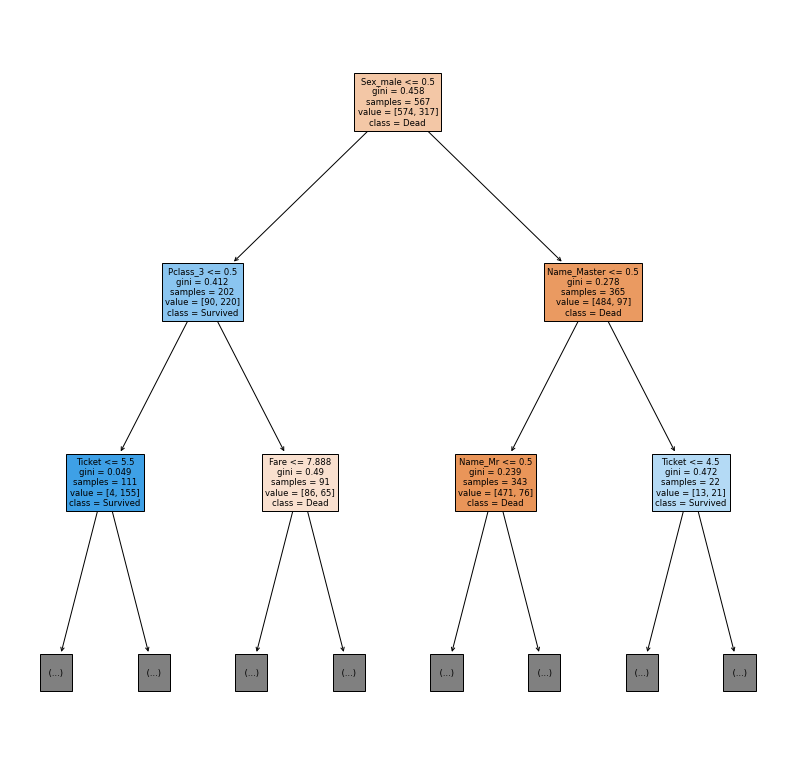

In [25]:
" 想知道 RandomForest 小決策樹的樣子 "
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 14))
plot_tree(clf.estimators_[0], 
     feature_names=combine.columns, 
     filled=True,
     max_depth = 2,
     class_names = ["Dead", "Survived"])

In [26]:
" 決策樹的可解釋性 feature_imortance "
imp = pd.DataFrame({
    "imp":clf.feature_importances_
}, index = combine.columns)
imp.sort_values(by = "imp", ascending = False)

,imp
Name_Mr,0.165007
Sex_male,0.146361
Sex_female,0.109780
Fare,0.100057
Age,0.070278
Pclass_3,0.062611
Ticket,0.059529
Family,0.041492
Name_Mrs,0.036725
Name_Miss,0.033410


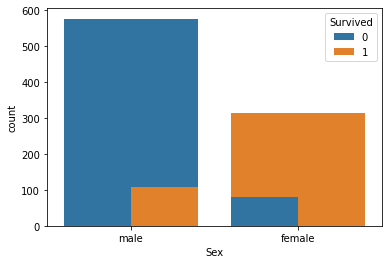

In [27]:
" 繪製所需圖表 "
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = datas["Sex"]) # x 軸是 Sex的圖表
sns.countplot(x = datas["Sex"], hue = datas["Survived"]) # x 軸是 Sex的圖表, 另外新增一個額外資料

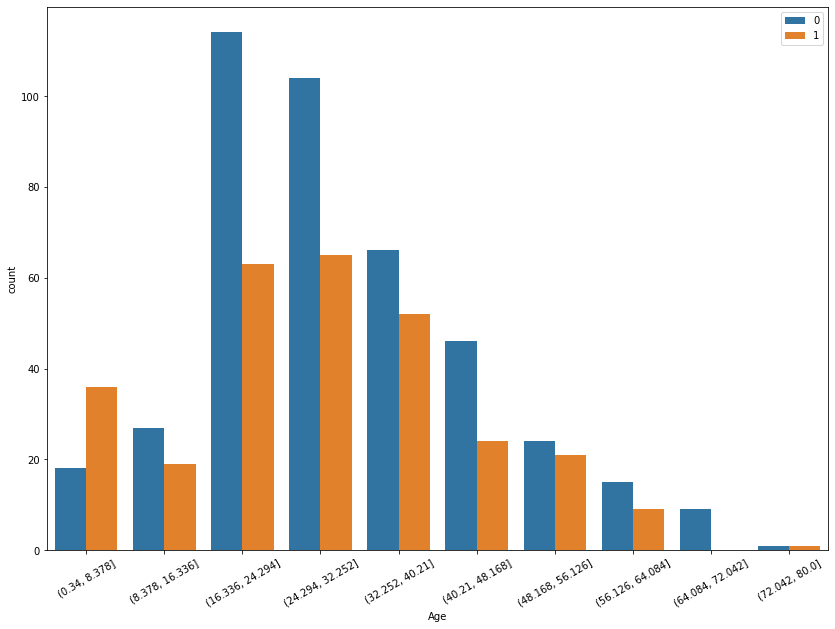

In [28]:
plt.figure(figsize = (14, 10)) # 圖片加寬加高
c = pd.cut(datas["Age"], 10)
sns.countplot(x = c, hue = datas["Survived"])
plt.xticks(rotation = 30)
plt.legend(loc = "upper right")

In [29]:
" 製圖應注意事項 "
# label: x,y 軸的標籤
# title: 圖表名稱
# ticks: 
# 

' 製圖應注意事項 '

In [30]:
" KNN (K Nearest Neighbors) "
# 抓目標, 而 K 跟目標附近的值最多, 就以該 K 為中心
"""
Scaling
1.MinMaxScaling -> min = 0, max = 1 --> (Pi - min) / (max - min)
ex: 2, 4, 6 轉換 -> 0, 2, 4 --> 最大差異為 4, 所以全部除以 4 ---> 再進行 Scaling公式
"""
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
combine_scale = scaler.fit_transform(combine) # combine_scale 已經是np array
combine_scale = pd.DataFrame(combine_scale)
combine_scale

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.273456,0.125,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.1
1,0.473882,0.125,0.000000,0.1,0.139136,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.1
2,0.323563,0.000,0.000000,0.0,0.015469,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.436302,0.125,0.000000,0.1,0.103644,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.1
4,0.436302,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1305,0.486409,0.000,0.000000,0.2,0.212559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1306,0.480145,0.000,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1307,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [31]:
x_scale = combine_scale.iloc[:len(datas)]
x_scale = np.array(x_scale)
y_scale = datas["Survived"]
y_scale = np.array(y_scale)
x_predict_scale = combine_scale.iloc[len(datas):]
x_predict_scale = np.array(x_predict_scale)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(2, 100)
}
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x_scale, y)
print(search.best_score_)
print(search.best_params_)

0.832796504369538
{'n_neighbors': 7}


In [33]:
# 平常我就是7, 但我現在靠點運氣
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scale, y)
pre = clf.predict(x_predict_scale)
result = pd.DataFrame({
    "PassengerId":predicts["PassengerId"],
    "Survived":pre
})
result.to_csv("knn.csv", encoding="utf-8", index=False)
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
